# Target Engineering - Event Based

Event-based targets are designed to capture meaningful **market transitions** or **structural changes** by focusing on specific events rather than fixed time intervals. These targets help identify **key price movements**, such as breakouts, reversals, or volatility shifts, which are often more relevant for trading decisions than time-based signals. In this notebook, we will create and analyze **event-driven targets** using the `quantreo` package to detect actionable patterns and enhance the timing of model predictions.


In [1]:
# Import the Target Engineering Package from Quantreo
import quantreo.target_engineering as te

# To display the graphics
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
# Import a dataset to test the functions and create new ones easily
from quantreo.datasets import load_generated_ohlcv
df = load_generated_ohlcv()
df = df.loc["2016"]

# Show the data
df

,open,high,low,close,volume
time,,,,,
2016-01-04 00:00:00,104.944241,105.312073,104.929735,105.232289,576.805768
2016-01-04 04:00:00,105.233361,105.252139,105.047564,105.149357,485.696723
2016-01-04 08:00:00,105.159851,105.384745,105.141110,105.330306,403.969745
2016-01-04 12:00:00,105.330306,105.505799,104.894155,104.923404,1436.917324
2016-01-04 16:00:00,104.914147,105.023293,104.913252,105.014347,1177.672605
...,...,...,...,...,...
2016-12-30 04:00:00,103.632257,103.711884,103.495896,103.564574,563.932484
2016-12-30 08:00:00,103.564574,103.629321,103.555581,103.616731,697.707475
2016-12-30 12:00:00,103.615791,103.628165,103.496810,103.515847,1768.926665


<br>

## **Peaks Valleys Detection**

The `detect_peaks_valleys` function identifies **structural turning points** in a price series by labeling **local maxima (peaks)** and **local minima (valleys)**. It is particularly useful to define event-driven targets that are independent of fixed time intervals.

- The function returns a label of `1` for a **peak**, `-1` for a **valley**, and `0` elsewhere.
- Internally, it leverages `scipy.signal.find_peaks` for robustness.

In [4]:
df["label"] = te.event_based.detect_peaks_valleys(df, col='close', distance=10, prominence=1)
df["label"]

time
2016-01-04 00:00:00    0
2016-01-04 04:00:00    0
2016-01-04 08:00:00    0
2016-01-04 12:00:00    0
2016-01-04 16:00:00    0
                      ..
2016-12-30 04:00:00    0
2016-12-30 08:00:00    0
2016-12-30 12:00:00    0
2016-12-30 16:00:00    0
2016-12-30 20:00:00    0
Name: label, Length: 1548, dtype: int64

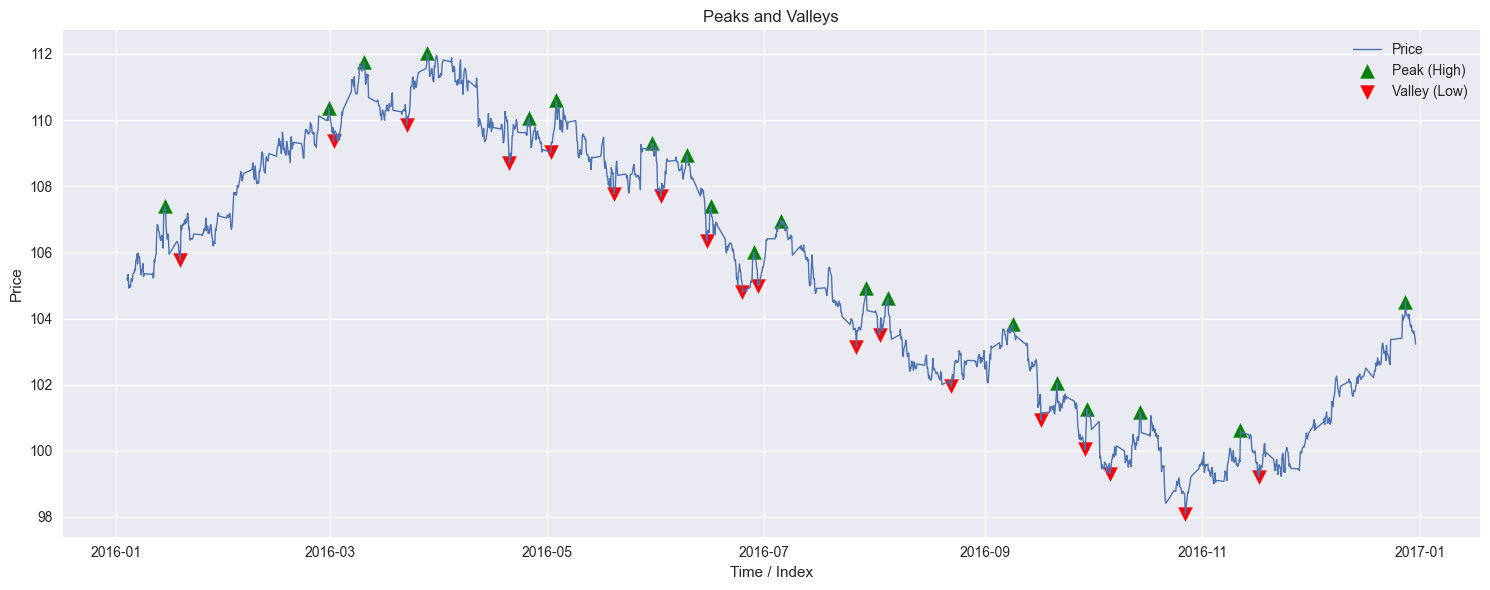

In [7]:
price_col = "close"
plt.figure(figsize=(15, 6))
plt.plot(df[price_col], label='Price', linewidth=1)

# Display peaks (label == 1)
plt.scatter(df.index[df['label'] == 1], df[price_col][df['label'] == 1], marker='^', color='green', s=100, label='Peak (High)')

# Display valleys (label == -1)
plt.scatter(df.index[df['label'] == -1], df[price_col][df['label'] == -1], marker='v', color='red', s=100, label='Valley (Low)')

plt.title('Peaks and Valleys')
plt.legend()
plt.grid(True)
plt.xlabel('Time / Index')
plt.ylabel('Price')
plt.tight_layout()
plt.show()